In [1]:
# Importing required libraries

import numpy as np
import scipy.stats as ss
from numpy.random import default_rng
import matplotlib.pyplot as plt 
import math
import pickle as pk
import pandas as pd
from scipy.stats import bernoulli
from tabulate import tabulate

In [2]:
# B.1.

def GetData(p,points):
  """
  p : P(x=1) = 0.2
  points : No. of points to generate
  """
  W = bernoulli.rvs(size=points,p=p)
  return W 

p = 0.2
points = 1000

# W = GetData(p,points)


In [3]:
# Saving data

path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_2/Saved_Data/'
# pk.dump(W, open(path+'Q2W.pkl', "wb"))

W = pk.load(open(path+'Q2W.pkl', "rb"))

print('Shape of Dataset : ',W.shape)
print('\nFew samples from Dataset: ')
print(list(W[:20]))


Shape of Dataset :  (1000,)

Few samples from Dataset: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [4]:
# B.2.

def GetMLE(Data,n):
  t = list(Data[:n])
  return sum(t)/len(t)

print('MLE over whole data : ',GetMLE(W,points))

MLE over whole data :  0.2


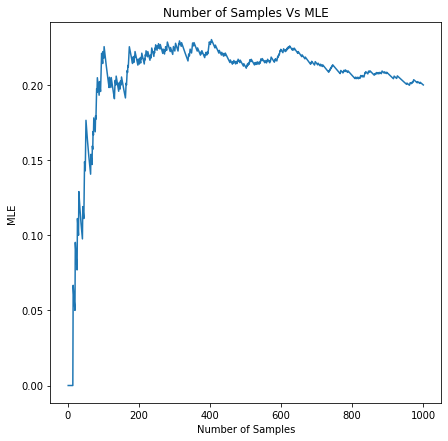

In [5]:
# B.3

ThetaMLE = []
for i in range(0,len(W)):
  ThetaMLE.append(GetMLE(W,i+1))

plt.figure(figsize=(7,7))
plt.plot(range(1,len(W)+1),ThetaMLE)
plt.xlabel('Number of Samples')
plt.ylabel('MLE')
plt.title('Number of Samples Vs MLE')
plt.show()


[0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.1, 0.09523809523809523, 0.09090909090909091, 0.08695652173913043, 0.08333333333333333, 0.08, 0.11538461538461539, 0.1111111111111111, 0.10714285714285714, 0.10344827586206896, 0.1, 0.0967741935483871, 0.125, 0.12121212121212122, 0.11764705882352941, 0.11428571428571428, 0.1388888888888889, 0.13513513513513514, 0.13157894736842105, 0.1282051282051282, 0.125, 0.12195121951219512, 0.11904761904761904, 0.11627906976744186, 0.11363636363636363, 0.1111111111111111, 0.10869565217391304, 0.1276595744680851, 0.125, 0.12244897959183673, 0.12, 0.13725490196078433, 0.15384615384615385, 0.1509433962264151, 0.14814814814814814, 0.16363636363636364, 0.17857142857142858, 0.17543859649122806, 0.1724137931034483, 0.1694915254237288, 0.16666666666666666, 

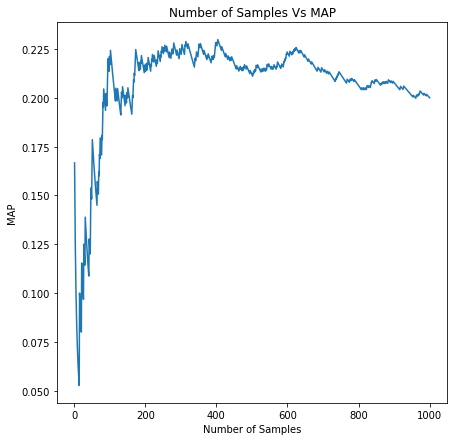

In [6]:
# B.4.

def GetMAP(Data,n,alpha,beta):
  
  MAP = (np.sum(Data[:n])+alpha - 1)/(n + alpha + beta-2)
  return MAP

alpha = 2
beta = 5

ThetaMAP = []
for i in range(1,len(W)+1):
  ThetaMAP.append(GetMAP(W,i,alpha,beta))
print(ThetaMAP)
plt.figure(figsize=(7,7))
plt.plot(range(1,len(W)+1),ThetaMAP)
plt.xlabel('Number of Samples')
plt.ylabel('MAP')
plt.title('Number of Samples Vs MAP')
plt.show()


In [7]:
threshold = [0.8 , 0.5 , 0.2 , 0.1 ,  0.001 , 0.01  , 0.002 , 0.02 ]
threshold.sort(reverse=True)
def GetOptimalSamples(Data,th,true_value):
  for i in range(len(Data)):
    if (abs(Data[i]-true_value)<th):
      return (i+1)   
  return len(Data)    
  
mlesamp = []
mapsamp = []  
for th in threshold:
  mlesamp.append(GetOptimalSamples(ThetaMLE,th,p))
  mapsamp.append(GetOptimalSamples(ThetaMAP,th,p))
  # print('\nNumber of samples required for MLE estimate with threshold : ',th,' are : ',GetOptimalSamples(ThetaMLE,th,p))  
  # print('Number of samples required for MAP estimate with threshold : ',th,' are : ',GetOptimalSamples(ThetaMAP,th,p))  

Res = pd.DataFrame()
Res['Threshold'] = threshold
Res['Samples required for MLE Estimate '] = mlesamp
Res['Samples required for MAP Estimate '] = mapsamp
print(tabulate(Res, headers = 'keys', tablefmt = 'psql')) 



+----+-------------+--------------------------------------+--------------------------------------+
|    |   Threshold |   Samples required for MLE Estimate  |   Samples required for MAP Estimate  |
|----+-------------+--------------------------------------+--------------------------------------|
|  0 |       0.8   |                                    1 |                                    1 |
|  1 |       0.5   |                                    1 |                                    1 |
|  2 |       0.2   |                                   15 |                                    1 |
|  3 |       0.1   |                                   27 |                                    1 |
|  4 |       0.02  |                                   80 |                                   78 |
|  5 |       0.01  |                                   81 |                                   81 |
|  6 |       0.002 |                                   85 |                                   85 |
|  7 |    